## ROMY Noise - Overview

Data from 2024-01-01 - 2024-03-31

In [1]:
import os
import gc
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [3]:
config = {}

config['path_to_models'] = data_path+f"LNM2/PSDS/"

config['path_to_figs'] = data_path+f"romy_noise/figures/"

## Load Data

In [4]:
df_models = pd.read_csv(data_path+"LNM/data/FINAL/"+"TLNM_to_RLNM.csv")

In [5]:
date_str = "2024-01-01_2024-03-31"

romy_z = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJZ_{date_str}.pkl")
romy_n = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJN_{date_str}.pkl")
romy_e = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJE_{date_str}.pkl")

romy_u = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJU_{date_str}.pkl")
romy_v = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_ROMY_BJV_{date_str}.pkl")

rlas_z = pd.read_pickle(data_path+f"LNM2/data/PSD_statistics_RLAS_BJZ_{date_str}.pkl")


In [6]:
romy_z

,frequencies,psds_median,perc_low,perc_high
0,0.000000,3.817539e-21,5.881521e-23,2.224977e-18
1,0.000139,7.451866e-21,1.322598e-22,4.183649e-18
2,0.000278,7.084324e-21,1.511994e-22,3.955349e-18
3,0.000417,7.369005e-21,1.612377e-22,4.070397e-18
4,0.000556,7.788417e-21,2.126872e-22,4.145521e-18
...,...,...,...,...
35997,4.999375,5.691705e-20,4.531513e-21,2.561320e-18
35998,4.999514,5.620877e-20,4.072472e-21,2.365059e-18
35999,4.999653,5.617387e-20,4.246613e-21,2.698459e-18
36000,4.999792,5.633681e-20,4.209606e-21,2.544671e-18


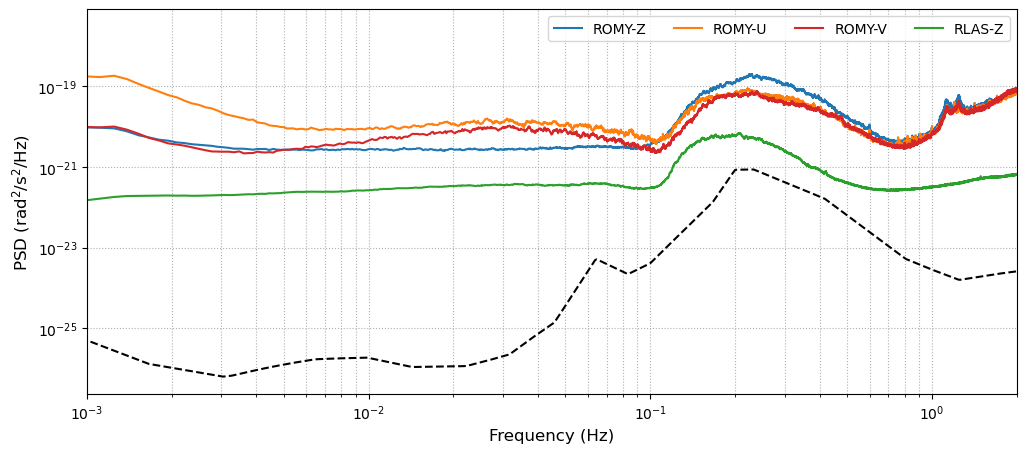

In [7]:
def __makeplot():

    Nrow, Ncol = 1, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 5))

    ax.plot(df_models.frequencies, df_models.nlnm_rot_rate, ls="--", color="black")

    ax.plot(romy_z.frequencies, romy_z.psds_median, ls="-", color="tab:blue", label="ROMY-Z")
    # ax.fill_between(romy_z.frequencies, romy_z.perc_low, romy_z.perc_high, color="tab:blue", alpha=0.3)

    ax.plot(romy_u.frequencies, romy_u.psds_median, ls="-", color="tab:orange", label="ROMY-U")
    # ax.fill_between(romy_u.frequencies, romy_u.perc_low, romy_u.perc_high, color="tab:orange", alpha=0.3)

    ax.plot(romy_v.frequencies, romy_v.psds_median, ls="-", color="tab:red", label="ROMY-V")
    # ax.fill_between(romy_v.frequencies, romy_v.perc_low, romy_v.perc_high, color="tab:red", alpha=0.3)

    ax.plot(rlas_z.frequencies, rlas_z.psds_median, ls="-", color="tab:green", label="RLAS-Z")

    ax.set_xlabel("Frequency (Hz)", fontsize=font)
    ax.set_ylabel("PSD (rad$^2$/s$^2$/Hz)", fontsize=font)

    ax.grid(which="both", ls=":", zorder=0)
    ax.legend(loc=1, ncol=4)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1e-3, 2e0)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RomyNoise_ZUV_median.png", format="png", dpi=150, bbox_inches='tight')


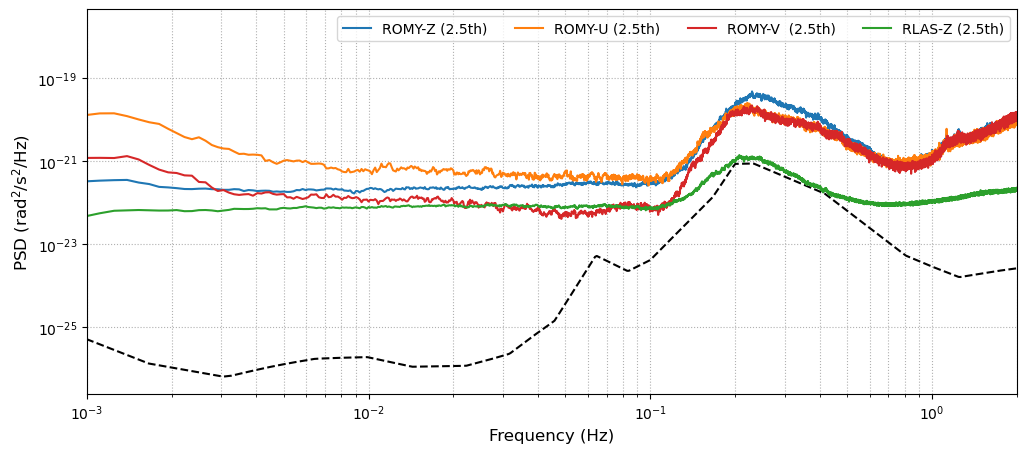

In [8]:
def __makeplot():

    Nrow, Ncol = 1, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 5))

    ax.plot(df_models.frequencies, df_models.nlnm_rot_rate, ls="--", color="black")

    ax.plot(romy_z.frequencies, romy_z.perc_low, ls="-", color="tab:blue", label="ROMY-Z (2.5th)")
    # ax.fill_between(romy_z.frequencies, romy_z.perc_low, romy_z.perc_high, color="tab:blue", alpha=0.3)

    ax.plot(romy_u.frequencies, romy_u.perc_low, ls="-", color="tab:orange", label="ROMY-U (2.5th)")
    # ax.fill_between(romy_u.frequencies, romy_u.perc_low, romy_u.perc_high, color="tab:orange", alpha=0.3)

    ax.plot(romy_v.frequencies, romy_v.perc_low, ls="-", color="tab:red", label="ROMY-V  (2.5th)")
    # ax.fill_between(romy_v.frequencies, romy_v.perc_low, romy_v.perc_high, color="tab:red", alpha=0.3)

    ax.plot(rlas_z.frequencies, rlas_z.perc_low, ls="-", color="tab:green", label="RLAS-Z (2.5th)")

    ax.set_xlabel("Frequency (Hz)", fontsize=font)
    ax.set_ylabel("PSD (rad$^2$/s$^2$/Hz)", fontsize=font)

    ax.grid(which="both", ls=":", zorder=0)
    ax.legend(loc=1, ncol=4)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1e-3, 2e0)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RomyNoise_ZUV_percentile.png", format="png", dpi=150, bbox_inches='tight')


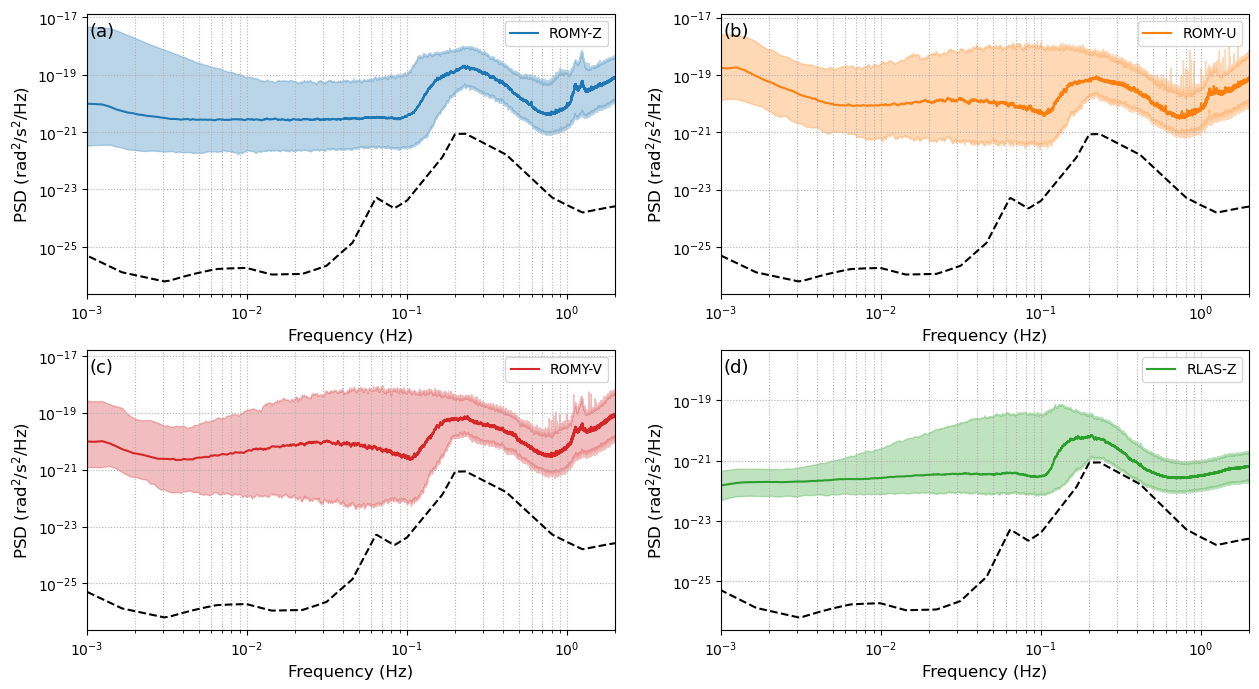

In [12]:
def __makeplot():

    Nrow, Ncol = 2, 2

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))


    ax[0, 0].plot(romy_z.frequencies, romy_z.psds_median, ls="-", color="tab:blue", label="ROMY-Z")
    ax[0, 0].fill_between(romy_z.frequencies, romy_z.perc_low, romy_z.perc_high, color="tab:blue", alpha=0.3)

    ax[0, 1].plot(romy_u.frequencies, romy_u.psds_median, ls="-", color="tab:orange", label="ROMY-U")
    ax[0, 1].fill_between(romy_u.frequencies, romy_u.perc_low, romy_u.perc_high, color="tab:orange", alpha=0.3)

    ax[1, 0].plot(romy_v.frequencies, romy_v.psds_median, ls="-", color="tab:red", label="ROMY-V")
    ax[1, 0].fill_between(romy_v.frequencies, romy_v.perc_low, romy_v.perc_high, color="tab:red", alpha=0.3)

    ax[1, 1].plot(rlas_z.frequencies, rlas_z.psds_median, ls="-", color="tab:green", label="RLAS-Z")
    ax[1, 1].fill_between(rlas_z.frequencies, rlas_z.perc_low, rlas_z.perc_high, color="tab:green", alpha=0.3)

    for i in range(Nrow):
        for j in range(Ncol):
            ax[i, j].plot(df_models.frequencies, df_models.nlnm_rot_rate, ls="--", color="black")

            ax[i, j].grid(which="both", ls=":", zorder=0)
            ax[i, j].legend(loc=1)
            ax[i, j].set_xscale("log")
            ax[i, j].set_yscale("log")
            ax[i, j].set_xlim(1e-3, 2e0)

            ax[i, j].set_xlabel("Frequency (Hz)", fontsize=font)
            ax[i, j].set_ylabel("PSD (rad$^2$/s$^2$/Hz)", fontsize=font)

    ax[0, 0].text(0.005, 0.97, "(a)", ha="left", va="top", transform=ax[0, 0].transAxes, fontsize=font+1)
    ax[0, 1].text(0.005, 0.97, "(b)", ha="left", va="top", transform=ax[0, 1].transAxes, fontsize=font+1)
    ax[1, 0].text(0.005, 0.97, "(c)", ha="left", va="top", transform=ax[1, 0].transAxes, fontsize=font+1)
    ax[1, 1].text(0.005, 0.97, "(d)", ha="left", va="top", transform=ax[1, 1].transAxes, fontsize=font+1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RomyNoise_ZUV_RLAS_individual.png", format="png", dpi=150, bbox_inches='tight')



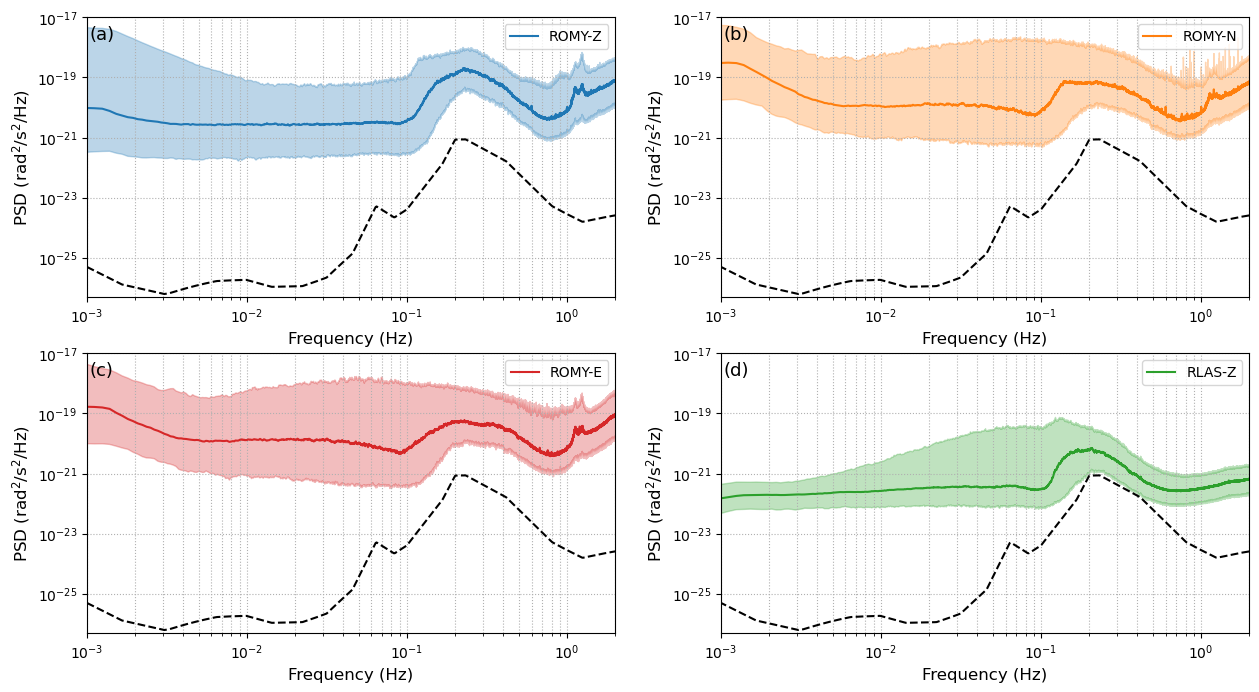

In [10]:
def __makeplot():

    Nrow, Ncol = 2, 2

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))


    ax[0, 0].plot(romy_z.frequencies, romy_z.psds_median, ls="-", color="tab:blue", label="ROMY-Z")
    ax[0, 0].fill_between(romy_z.frequencies, romy_z.perc_low, romy_z.perc_high, color="tab:blue", alpha=0.3)

    ax[0, 1].plot(romy_n.frequencies, romy_n.psds_median, ls="-", color="tab:orange", label="ROMY-N")
    ax[0, 1].fill_between(romy_n.frequencies, romy_n.perc_low, romy_n.perc_high, color="tab:orange", alpha=0.3)

    ax[1, 0].plot(romy_e.frequencies, romy_e.psds_median, ls="-", color="tab:red", label="ROMY-E")
    ax[1, 0].fill_between(romy_e.frequencies, romy_e.perc_low, romy_e.perc_high, color="tab:red", alpha=0.3)

    ax[1, 1].plot(rlas_z.frequencies, rlas_z.psds_median, ls="-", color="tab:green", label="RLAS-Z")
    ax[1, 1].fill_between(rlas_z.frequencies, rlas_z.perc_low, rlas_z.perc_high, color="tab:green", alpha=0.3)

    for i in range(Nrow):
        for j in range(Ncol):
            ax[i, j].plot(df_models.frequencies, df_models.nlnm_rot_rate, ls="--", color="black")

            ax[i, j].grid(which="both", ls=":", zorder=0)
            ax[i, j].legend(loc=1)
            ax[i, j].set_xscale("log")
            ax[i, j].set_yscale("log")
            ax[i, j].set_xlim(1e-3, 2e0)
            ax[i, j].set_ylim(5e-27, 1e-17)

            ax[i, j].set_xlabel("Frequency (Hz)", fontsize=font)
            ax[i, j].set_ylabel("PSD (rad$^2$/s$^2$/Hz)", fontsize=font)

    ax[0, 0].text(0.005, 0.97, "(a)", ha="left", va="top", transform=ax[0, 0].transAxes, fontsize=font+1)
    ax[0, 1].text(0.005, 0.97, "(b)", ha="left", va="top", transform=ax[0, 1].transAxes, fontsize=font+1)
    ax[1, 0].text(0.005, 0.97, "(c)", ha="left", va="top", transform=ax[1, 0].transAxes, fontsize=font+1)
    ax[1, 1].text(0.005, 0.97, "(d)", ha="left", va="top", transform=ax[1, 1].transAxes, fontsize=font+1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"RomyNoise_ZNE_Rlas_individual.png", format="png", dpi=150, bbox_inches='tight')

